In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a custom dataset
np.random.seed(42)  # For reproducibility


data = pd.DataFrame({
    'idade': np.random.randint(18, 70, size=100).astype(int),  # Ensure integer type
    'renda': np.random.randint(30000, 120000, size=100),  # Renda entre 30K e 120K
    'genero': np.random.choice(['Masculino', 'Feminino'], size=100)  # Random gender
})

# Perform descriptive analysis
data.describe()  # Summary statistics for numeric columns

,idade,renda
count,100.000000,100.000000
mean,43.350000,75544.160000
std,14.904663,25841.710202
min,19.000000,30206.000000
25%,31.750000,53229.750000
50%,42.000000,79032.000000
75%,57.000000,95538.250000
max,69.000000,119135.000000


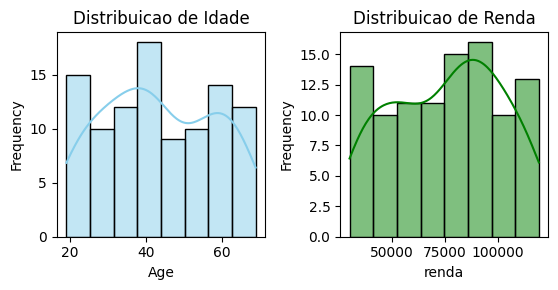

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

# Histogram and KDE for 'age'
sns.histplot(data['idade'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribuicao de Idade')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Histogram and KDE for 'income'
sns.histplot(data['renda'], kde=True, ax=axs[1], color='green')
axs[1].set_title('Distribuicao de Renda')
axs[1].set_xlabel('renda')
axs[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [3]:
# Discrete data example: 'gender' (categorical)
Genero_total = data['genero'].value_counts()

# Continuous data example: 'age' and 'income' (numerical)
Idade_stats = data['idade'].describe()
renda_stats = data['renda'].describe()

# Display results
print("Distribuicao de Genero:")
print(Genero_total)

print("Idade :")
print(Idade_stats)

print("Renda Statistics :")
print(renda_stats)

Distribuicao de Genero:
genero
Feminino     52
Masculino    48
Name: count, dtype: int64
Idade :
count    100.000000
mean      43.350000
std       14.904663
min       19.000000
25%       31.750000
50%       42.000000
75%       57.000000
max       69.000000
Name: idade, dtype: float64
Renda Statistics :
count       100.000000
mean      75544.160000
std       25841.710202
min       30206.000000
25%       53229.750000
50%       79032.000000
75%       95538.250000
max      119135.000000
Name: renda, dtype: float64


In [4]:
data

,idade,renda,genero
0,56,91228,Feminino
1,69,78984,Masculino
2,46,70774,Masculino
3,32,32568,Masculino
4,60,92592,Masculino
...,...,...,...
95,42,69353,Masculino
96,62,92003,Feminino
97,58,113211,Feminino
98,46,82733,Feminino


In [8]:
def filter_genero(df, genero="Feminino", reset_index=False, case_sensitive=False):
    """
    Filtra um DataFrame pandas pela coluna 'genero'.
    Parâmetros:
    - df: pandas.DataFrame que contém a coluna 'genero'
    - genero: valor a filtrar (default "Feminino")
    - reset_index: se True, retorna o resultado com index reiniciado
    - case_sensitive: se True, compara sensível a maiúsc./minúsc.
    Retorna: DataFrame filtrado (cópia).
    """
    if 'genero' not in df.columns:
        raise ValueError("O DataFrame deve conter a coluna 'genero'.")
    if genero is None:
        result = df.copy()
    else:
        if case_sensitive:
            mask = df['genero'] == genero
        else:
            mask = df['genero'].astype(str).str.lower() == str(genero).lower()
        result = df[mask].copy()
    if reset_index:
        result = result.reset_index(drop=True)
    return result

In [ ]:
df = data

In [7]:
# Apply the filter_genero function to filter by gender
filtered_data_feminino = data[data['genero'] == 'Feminino']
filtered_data_masculino = data[data['genero'] == 'Masculino']

print("Filtered data for Feminino:")
print(filtered_data_feminino)

print("\nFiltered data for Masculino:")
print(filtered_data_masculino)

Filtered data for Feminino:
    idade   renda    genero
0      56   91228  Feminino
5      25   97563  Feminino
9      40  117538  Feminino
10     28   69504  Feminino
11     28   63159  Feminino
12     41   43986  Feminino
15     41   68660  Feminino
19     41   82251  Feminino
20     61   52662  Feminino
22     55   60535  Feminino
23     19  108603  Feminino
24     38   82256  Feminino
25     50  119135  Feminino
26     29   65222  Feminino
28     61  109575  Feminino
31     44   40965  Feminino
35     32  109309  Feminino
36     64   57266  Feminino
38     61  112948  Feminino
39     69   36910  Feminino
40     20   30206  Feminino
41     54  117054  Feminino
44     38   80636  Feminino
45     26   80015  Feminino
48     21   48141  Feminino
50     31  101910  Feminino
51     67   86044  Feminino
54     19   85820  Feminino
55     37   92623  Feminino
57     64  105450  Feminino
59     61   73585  Feminino
63     31   32693  Feminino
64     34   99163  Feminino
66     67   78925  F